# Semi-Discrete Optimal Transport on Banana Distribution

In this notebook, we explore concepts related to semi-discrete optimal transport, with examples in two dimensions. The topics covered include:

1. The generation of simulated data (Banana distribution).
2. The implementation of the stochastic gradient descent algorithm.
3. The visualization of the algorithm's convergence.
4. The highlighting of quantiles and the multivariate median.

In [1]:
pip install pot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.7/901.7 kB 15.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

# Banana Distribution

## Data Generation

In [3]:
# Data Generation
y = generate_data(501, 'banana')

## Plotting the Data

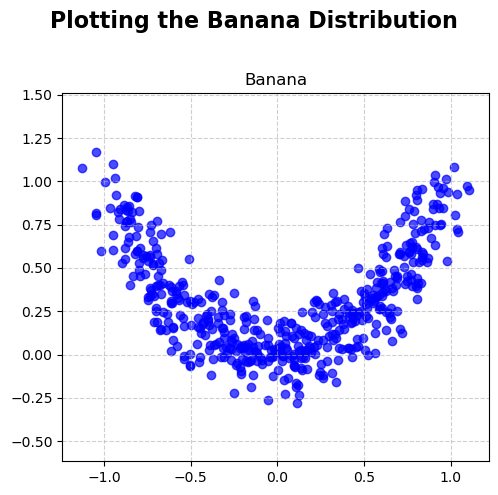

In [4]:
plot_data([y], ['Banana'], 'Plotting the Banana Distribution')

# Optimal Transport

## Stochastic Gradient Descent Algorithm

In [5]:
# Parameters and Execution
n, d = y.shape
v_initial = np.zeros(n)
gamma = n / 10
iterations = 1000

v_final, W = stochastic_gradient_descent(v_initial, y, gamma, iterations)


### Convergence of the Algorithm

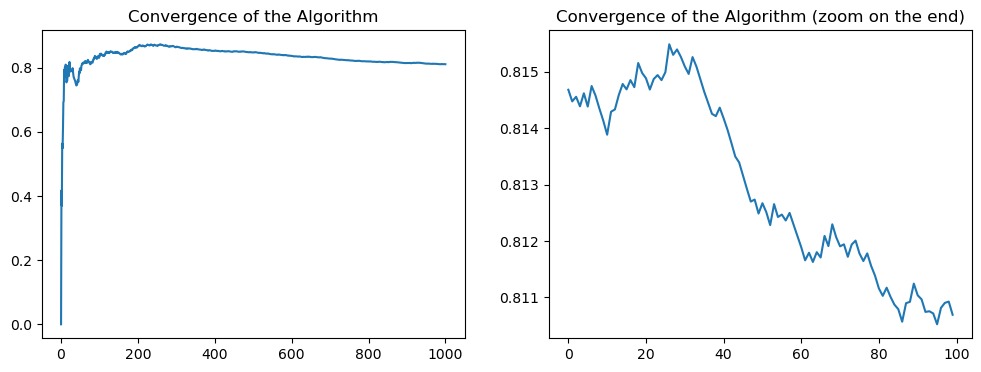

In [6]:
plt.figure(figsize = (12 , 4))
# Plotting the convergence of the algorithm
plt.subplot(1,2,1)
plt.plot(W)
plt.title("Convergence of the Algorithm")

# Zoom on the last iterations of the algorithm
plt.subplot(1,2,2)
plt.plot(W[-100:])
plt.title("Convergence of the Algorithm (zoom on the end)")

# Displaying the plots
plt.show()

## Median and quantiles

### Calculation of the Multivariate Median and Quantiles

In [7]:

s = quantiles(0, 0, y, v_final)[1]


### Plotting Univariate and Multivariate Medians

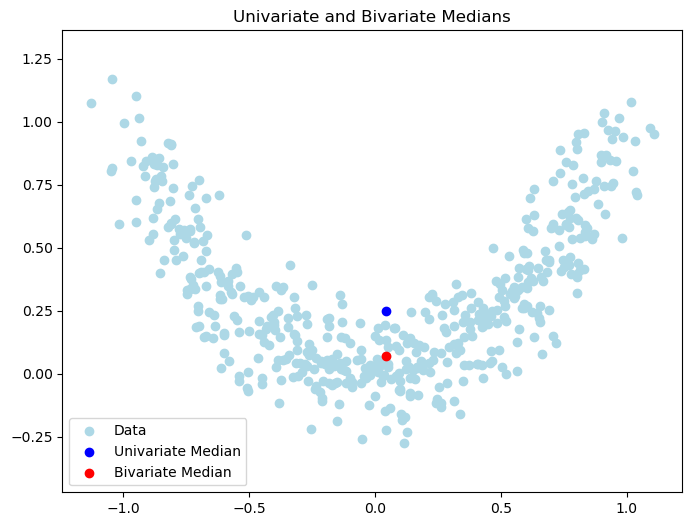

In [8]:
x_coords = y[:, 0]
y_coords = y[:, 1]
x_med, y_med = univariate_median(y)

plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, color="lightblue", label="Data")
plt.scatter(x_med, y_med, color="blue", label="Univariate Median")
plt.scatter(y[s][0], y[s][1], color="red", label="Bivariate Median")
plt.title("Univariate and Bivariate Medians")
plt.legend()
plt.axis("equal")
plt.show()


### Plotting the 0.5 Quantile

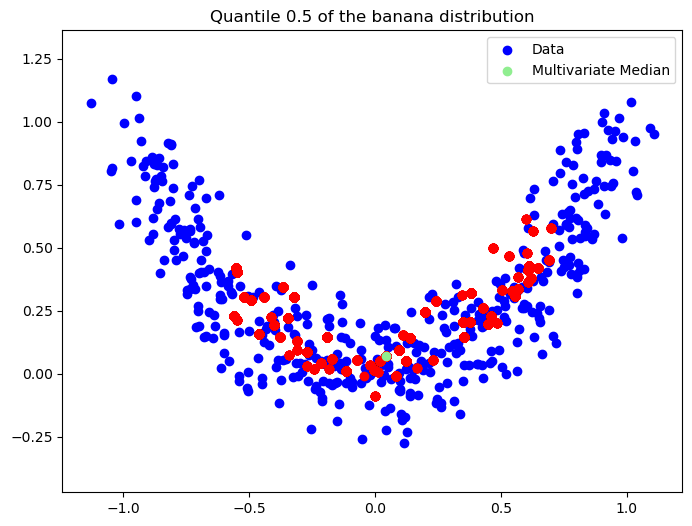

In [9]:
# Displaying the 0.5 Quantile Contour
z = circle(0.5, 200)  # Generating points on the circle
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, color="blue", label="Data")  # Initial data

# Calculating and displaying points in the 0.5 quantile
for point in z:  # Each `point` is an array [x, y]
    index = quantiles(point[0], point[1], y, v_final)[1]
    plt.scatter(y[index][0], y[index][1], color="red")

# Displaying the multivariate median
median_index = quantiles(0, 0, y, v_final)[1]
plt.scatter(y[median_index][0], y[median_index][1], color="lightgreen", label="Multivariate Median")

# Configuring the figure
plt.axis("equal")
plt.title("Quantile 0.5 of the banana distribution")
plt.legend()
plt.show()



# Conclusion

This notebook provides a comprehensive analysis of the calculation of bivariate medians through semi-discrete optimal transport methods. 
We demonstrated the theoretical foundations, computational implementation, and results obtained using synthetic data. 
The results confirm the robustness and efficiency of the approach, offering insights into data distribution analysis. 
This methodology can be extended to higher-dimensional datasets and other applications requiring optimal transport solutions.

Further exploration could involve performance benchmarking with larger datasets or adapting the method for real-world applications like finance or image processing.
